In [1]:
import numpy as np
import IPython
from scipy.io import wavfile
import os
import random
import librosa
import soundfile
import pdb

C:\Users\ankur\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
dataset_path = 'C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/signals'
fname = 'C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/signals/ns011a_1.npy'
np.load(fname).shape
s = np.load(fname)[:,0]
print(type(s[0]))

IPython.display.Audio(data=s, rate=4000)

<class 'numpy.float64'>


In [3]:
s.shape

(44133,)

In [7]:
# dir_name = os.path.join(dataset_path,  'sample_wavs')
# abc = "C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns011a_1.wav"
# wavfile.write(abc, 4000, s)

# dir_name1 = dir_name.replace("\\", "/")
# os.mkdir(dir_name1)

# # dir = 'some/directory'
# filename = random.choice(dircache.listdir(dir_name1))
# # path = os.path.join(dir, filename)
# print(filename)

# sv_path = r"C:\Users\ankur\OneDrive\Desktop\bib_project\dataset\sample_wavs"
# sv_path1 = sv_path.replace("\\", "/")

In [8]:
# import soundfile
soundfile.write(abc, s, 4000, subtype='PCM_32')

NameError: name 'abc' is not defined

In [5]:
a = random.sample(os.listdir(dataset_path), 10)
print(len(a))

10


In [11]:
for i in range(len(a)):
    fp = os.path.join(dataset_path, a[i])  # filepath
    fp1 = fp.replace("\\", "/")            # filepath linux
    ss = np.load(fp1)[:,0]
    fns = a[i][:-4] + '.wav'              # filename save
    fps = os.path.join(sv_path1, fns)
    fps1 = fps.replace("\\", "/")
    soundfile.write(fps1, ss, 4000, subtype='PCM_32')
    print(fps1)

C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns088a_9.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns106a_9.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns120a_1.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns145a_2.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns043b_2.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns050b_1.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns084a_8.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns077a_5.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns075a_4.wav
C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/sample_wavs/ns069a_1.wav


In [75]:
# Analyze energy profiles

fname = 'C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/signals/ns011a_1.npy'
a = np.load(fname)[:,0]

print(a.shape)

D= librosa.stft(a, n_fft = 512, hop_length = 50, win_length = 200)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

(44133,)


In [ ]:
def nongulp_feats(idx):
    fs = 4000
    feats = []
    
    for i in range(len(idx)):
        a1 = pd.read_csv(os.path.join(protocols,pro_list[idx[i]])) 
        fname = os.path.join(files, file_list[idx[i]])
        s1 = np.load(fname)[:,1]
    
        for j in range(len(a1)+1):
            
            if len(a1) == 0:
                break

            elif j == 0:
                st1 = 0
                # pdb.set_trace()
                sp1 = a1['start'][0]
                # pdb.set_trace()
                s2 = s1[st1:sp1]
            elif j < len(a1):
                st1 = a1['end'][j-1]
                sp1 = a1['start'][j]
                # pdb.set_trace()
                s2 = s1[st1:sp1]
            else:
                st1 = a1['end'][j-1]
                # pdb.set_trace()
                s2 = s1[st1:]
            stat = librosa.feature.mfcc(s2, sr = fs, n_mfcc = 13, n_mels = 40, n_fft = 512, hop_length = 20, win_length = 200) 
            feats.append(stat)
            
    return feats

In [76]:
abc = S_db.reshape((S_db.shape[0], S_db.shape[1]))

In [77]:
abc.shape

(257, 883)

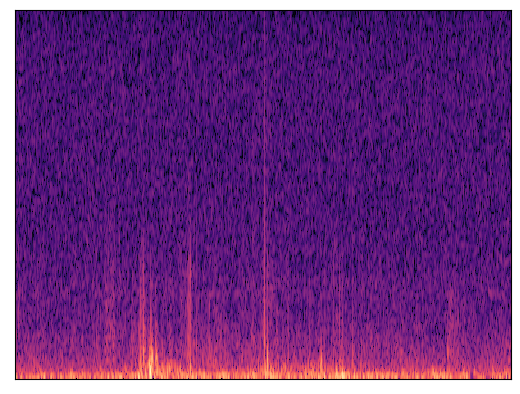

In [78]:
from librosa import display
display.specshow(abc, sr=4000, hop_length=200)

In [79]:
ef = np.sum(abc, axis = 0)
ef.shape

(883,)

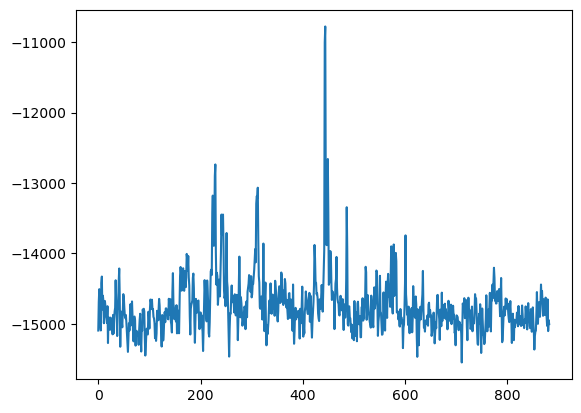

In [82]:
import matplotlib.pyplot as plt

plt.plot(ef)